## Product Dataset
Imagine you're running a price comparison website (like PriceRunner or Google Shopping). You collect product listings from hundreds of online shops — each selling phones, TVs, headphones, etc.

The problem is:

Every store uses slightly different names and descriptions.

You want to know:
👉 "Are these two listings for the same product?"
👉 "Can I automatically group similar products?"

That’s where this dataset comes in.

📦 What’s Inside the Dataset?
It has 35,000+ product offers with the following info:

## Column	Description
- Product ID	A unique code for the product offer
- Title	The name/description of the product (like "Samsung Galaxy S21 128GB")
- Merchant ID	The shop selling it (like Amazon, Walmart, etc.)
- Category ID	The product category (e.g., Phones, TVs, Laptops)
- Cluster ID	(Optional) If known, a human-verified group showing which items match


Imagine you're building an app. When a new product (like "Samsung Galaxy S21") comes in, your app should automatically predict what category it belongs to (e.g., Phone, TV, Laptop).

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [28]:
df = pd.read_csv("C://Users//Nandhika//Downloads//Product_Data//pricerunner_aggregate.csv")

In [9]:
print("Shape:",df.shape)
df.head(2)

Shape: (35311, 7)


,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [14]:
df = df[['Product Title', ' Category Label']].dropna()
print("Data loaded:", df.shape)
#The UCI Repo mentions that there would be no missing values

Data loaded: (35311, 2)


In [15]:
#Checking the number of Labels
print(df[' Category Label'].unique())

['Mobile Phones' 'TVs' 'CPUs' 'Digital Cameras' 'Microwaves' 'Dishwashers'
 'Washing Machines' 'Freezers' 'Fridge Freezers' 'Fridges']


In [17]:
category_counts = df[' Category Label'].value_counts()
print("\nCategory Distribution:")
print(category_counts)


Category Distribution:
 Category Label
Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: count, dtype: int64


C:\Users\Nandhika\AppData\Local\Temp\ipykernel_39948\3521576956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=' Category Label', order=category_counts.index, palette='pastel')


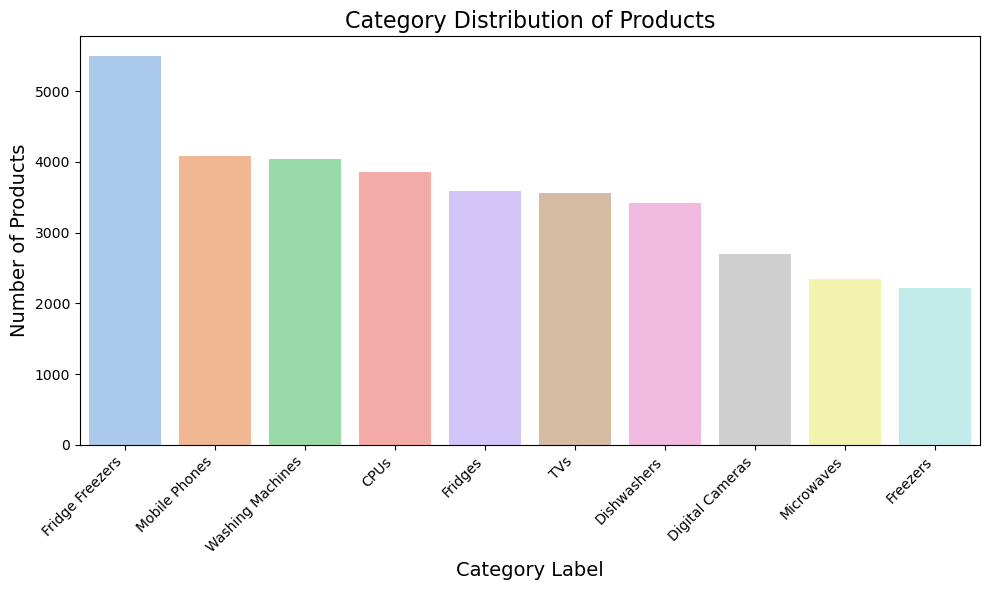

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x=' Category Label', order=category_counts.index, palette='pastel')

# Add title and labels
plt.title('Category Distribution of Products', fontsize=16)
plt.xlabel('Category Label', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
#Imbalance is there but not too much
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Product Title'])

- TF = How often a word appears in one product title.

- IDF = How unique that word is across all product titles.

- TF-IDF = A combined score that gives a higher importance to words that are frequent in one title but rare across many titles.

- High TF-IDF score: Words that are important (e.g., "iPhone", "Laptop")

- Low TF-IDF score: Common words (e.g., "the", "and", "is") or words that appear in every title

- By using TF-IDF, we convert product titles into numerical data (vectors) where:

- Each word is a feature.

- The TF-IDF score tells how important that word is for classification.

- KNN uses these vectors to classify products by comparing the "distance" between product titles. The more similar the titles (based on TF-IDF vectors), the closer the products are in the KNN algorithm.

In [25]:
#Encoding the target labels
y = df[' Category Label']

In [32]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaling is important for KNN because KNN relies on the distance between data points (like Euclidean distance). If the features have different scales (e.g., product titles' TF-IDF features and body weight), the distance metric might be dominated by features with larger values.

In [31]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)  # StandardScaler needs sparse data
X_scaled = scaler.fit_transform(X)

In [33]:
#Hyperparameter Tuning
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


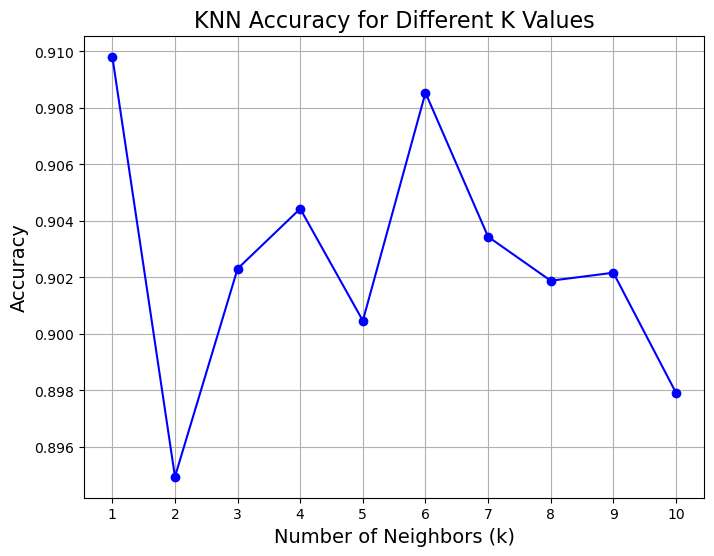

In [34]:
#Elbow Method Plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different K Values', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [35]:
#Best K
best_k = accuracies.index(max(accuracies)) + 1
print(f"Best K value: {best_k} with accuracy {max(accuracies)}")

Best K value: 1 with accuracy 0.9098116947472745


In [36]:
# 10. Final Prediction with Best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
print("\nFinal Classification Report with Best K:")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))


Final Classification Report with Best K:
                  precision    recall  f1-score   support

            CPUs       1.00      0.99      0.99       771
 Digital Cameras       0.99      0.99      0.99       542
     Dishwashers       0.98      0.87      0.92       662
        Freezers       0.74      0.74      0.74       439
 Fridge Freezers       0.83      0.88      0.85      1115
         Fridges       0.84      0.78      0.81       728
      Microwaves       0.77      0.97      0.86       469
   Mobile Phones       0.99      0.97      0.98       818
             TVs       0.99      0.97      0.98       723
Washing Machines       0.96      0.91      0.94       796

        accuracy                           0.91      7063
       macro avg       0.91      0.91      0.91      7063
    weighted avg       0.91      0.91      0.91      7063



Thinking that the model might have overfitted because K=1 is too complex, trying with Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    print(f"k={k}, Cross-validated accuracy: {scores.mean():.4f}")


k=1, Cross-validated accuracy: 0.8326
k=2, Cross-validated accuracy: 0.8133
k=3, Cross-validated accuracy: 0.8180
k=4, Cross-validated accuracy: 0.8153
k=5, Cross-validated accuracy: 0.8130
k=6, Cross-validated accuracy: 0.8092
k=7, Cross-validated accuracy: 0.8065
k=8, Cross-validated accuracy: 0.8058
k=9, Cross-validated accuracy: 0.8063
k=10, Cross-validated accuracy: 0.8056


In [ ]:
#Still getting the same results. Will try later 
I am humbly learning here. So I place my sincer apologizes in any errors that I could have potentially made and request guidance from you!
Tah